# Logistic Regression codealong

In this **codealong** you will see how logistic regression works very graphically. 

In [14]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [15]:
# Next, we’ll take advantage of the make_classification function from the scikit-learn library to generate data. As we mentioned previously, 
#Logistic Regression is only applicable to binary classification problems. 
#Thus, the data points are composed of two classes.

In [16]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

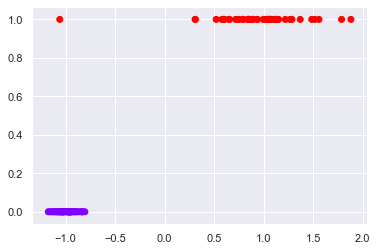

In [17]:
# We plot the relationship between the feature and classes.
plt.scatter(x, y, c=y, cmap='rainbow')

In [18]:
#Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [19]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features and the labels (since Logistic Regression is a
#supervised machine learning algorithm) as arguments.

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.
print(lr.coef_)
print(lr.intercept_)

[[2.99529084]]
[0.56685521]


In [21]:
# Let’s see how the model performs against data that it hasn’t been trained on.

In [22]:
y_pred = lr.predict(x_test)

In [23]:
# Given that this consists of a classification problem, 
#we use a confusion matrix to measure the accuracy of our model.

confusion_matrix(y_test, y_pred)


array([[17,  0],
       [ 0,  8]])

In [24]:
# If for whatever reason we’d like to check the actual probability that a data 
#point belongs to a given class, 
#we can use the predict_proba function.

lr.predict_proba(x_test)

array([[0.04328799, 0.95671201],
       [0.90469305, 0.09530695],
       [0.03840191, 0.96159809],
       [0.90840226, 0.09159774],
       [0.00267465, 0.99732535],
       [0.00656531, 0.99343469],
       [0.92793094, 0.07206906],
       [0.0869285 , 0.9130715 ],
       [0.02248093, 0.97751907],
       [0.90330898, 0.09669102],
       [0.92717745, 0.07282255],
       [0.94129274, 0.05870726],
       [0.03328123, 0.96671877],
       [0.0144586 , 0.9855414 ],
       [0.93308806, 0.06691194],
       [0.92392556, 0.07607444],
       [0.89603692, 0.10396308],
       [0.91483727, 0.08516273],
       [0.90925068, 0.09074932],
       [0.9121001 , 0.0878999 ],
       [0.93446094, 0.06553906],
       [0.91676937, 0.08323063],
       [0.92384396, 0.07615604],
       [0.89589081, 0.10410919],
       [0.931536  , 0.068464  ]])

In [25]:
# The first column corresponds to the 
#probability that the sample belongs to the first class and the
#second column corresponds to the probability that the 
#sample belongs to the second class.
#Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

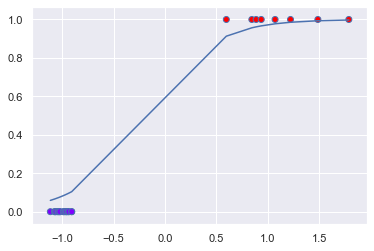

In [26]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')